In [13]:
import pickle
import matplotlib.pyplot as plt

In [14]:
new_model = pickle.load(open('svcmodel.pkl','rb'))

In [15]:
new_tunned_Model = pickle.load(open('tunnedModel.pkl','rb'))

In [16]:
image_data= pickle.load(open('mydata.pkl','rb'))

In [17]:
import random
random.shuffle(image_data)
features=[]
labels=[]

for feature,label in image_data:
    features.append(feature)
    labels.append(label)

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(features,labels,test_size=0.3)

## prediction with normal model

In [19]:
prediction = new_model.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix
print(accuracy_score(prediction,y_test))
print(confusion_matrix(prediction,y_test))

0.9958847736625515
[[29  0  0  0  0  0  0  0  0]
 [ 0 25  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0]
 [ 0  0  0 30  0  0  0  0  0]
 [ 0  0  0  0 29  0  0  0  1]
 [ 0  0  0  0  0 29  0  0  0]
 [ 0  0  0  0  0  0 34  0  0]
 [ 0  0  0  0  0  0  0 24  0]
 [ 0  0  0  0  0  0  0  0 22]]


## prediction with tunned model

In [20]:
prediction_tune = new_tunned_Model.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix
print(accuracy_score(prediction_tune,y_test))
print(confusion_matrix(prediction_tune,y_test))

0.9876543209876543
[[28  0  0  0  0  0  0  0  0]
 [ 1 25  0  0  0  0  1  0  0]
 [ 0  0 20  0  0  0  0  0  0]
 [ 0  0  0 29  0  0  0  0  0]
 [ 0  0  0  0 29  0  0  0  0]
 [ 0  0  0  0  0 29  0  0  0]
 [ 0  0  0  0  0  0 33  0  0]
 [ 0  0  0  1  0  0  0 24  0]
 [ 0  0  0  0  0  0  0  0 23]]


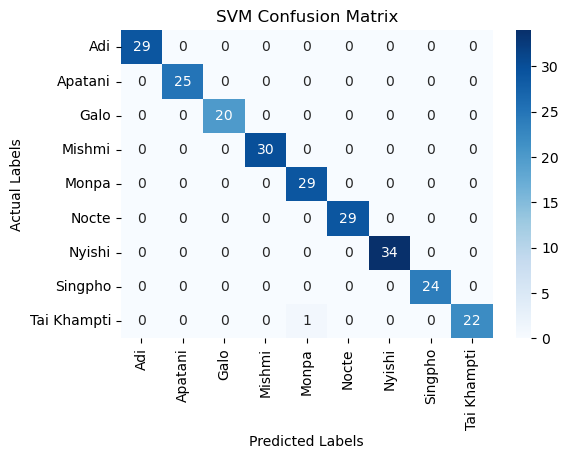

In [21]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute Confusion Matrix
cm = confusion_matrix(y_test, prediction)

# Plot using Seaborn
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Adi','Apatani','Galo','Mishmi','Monpa','Nocte','Nyishi','Singpho','Tai Khampti'], yticklabels=['Adi','Apatani','Galo','Mishmi','Monpa','Nocte','Nyishi','Singpho','Tai Khampti'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('SVM Confusion Matrix')
plt.show()


### Here ,we are getting 99% accuracy with the normal model and 98% accuracy with hypertunned model

## Now checking for a single random image

In [22]:
import cv2
import os
import numpy as np
categories = ['Adi','Apatani','Galo','Mishmi','Monpa','Nocte','Nyishi','Singpho','Tai Khampti']
data=[]
dir = "C:\MinorProjectUpgraded\MINOR PROJECT DATA SET UPGRADED"
path = os.path.join(dir,categories[1])
img = os.listdir(path)[50]
imagepath = os.path.join(path,img)
dress_image = cv2.imread(imagepath,0)
dress_image=cv2.resize(dress_image,(150,150))
image= np.array(dress_image).flatten()
data.append(image)


<>:6: SyntaxWarning: invalid escape sequence '\M'
<>:6: SyntaxWarning: invalid escape sequence '\M'
C:\Users\anujc\AppData\Local\Temp\ipykernel_14456\1466758381.py:6: SyntaxWarning: invalid escape sequence '\M'
  dir = "C:\MinorProjectUpgraded\MINOR PROJECT DATA SET UPGRADED"


In [23]:
prediction = new_model.predict(data)

prediction is Apatani


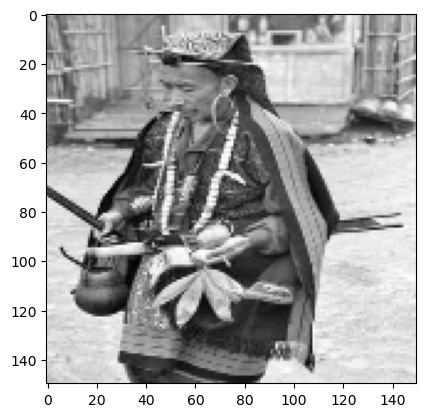

In [24]:
print("prediction is", categories[prediction[0]])

real_image = image.reshape(150,150)
plt.imshow(real_image,cmap='gray')
plt.show()